In [1]:
pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [3]:
heart_df = pd.read_csv("/content/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
OneHotEncoder = OneHotEncoder(sparse_output=False)

target_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


for i in target_columns:
  heart_df[i] = OneHotEncoder.fit_transform(heart_df[[i]])
  print(heart_df.value_counts([i]), '\n\n------')

Sex
0.0    725
1.0    193
Name: count, dtype: int64 

------
ChestPainType
1.0              496
0.0              422
Name: count, dtype: int64 

------
RestingECG
0.0           730
1.0           188
Name: count, dtype: int64 

------
ExerciseAngina
1.0               547
0.0               371
Name: count, dtype: int64 

------
ST_Slope
0.0         855
1.0          63
Name: count, dtype: int64 

------


In [5]:
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0.0,0.0,140,289,0,0.0,172,1.0,0.0,0.0,0
1,49,1.0,0.0,160,180,0,0.0,156,1.0,1.0,0.0,1
2,37,0.0,0.0,130,283,0,0.0,98,1.0,0.0,0.0,0
3,48,1.0,1.0,138,214,0,0.0,108,0.0,1.5,0.0,1
4,54,0.0,0.0,150,195,0,0.0,122,1.0,0.0,0.0,0


In [7]:
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [8]:
model = DecisionTreeClassifier(random_state=42)

param_grid = {
      'max_depth': [3, 5, 7],
      'min_samples_split': [2, 5, 10],
      'criterion': ['gini', 'entropy']
      }

In [9]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy', # 'accuracy', 'f1', 'roc_auc', etc
                           n_jobs=-1
                           ) # Use all available processors

In [10]:
y = heart_df['HeartDisease']
X = heart_df.drop(['HeartDisease'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [11]:
print(y.value_counts())
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_: .2f}")

HeartDisease
1    508
0    410
Name: count, dtype: int64
Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score:  0.81


In [13]:
from sklearn.metrics import classification_report

In [14]:


hist_model = HistGradientBoostingClassifier(max_bins=12, max_iter=100)
hist_model.fit(X_train, y_train) # Fit training set to model
y_pred = hist_model.predict(X_test) # Train prediciton
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy:.3f}')
print("Classification Report ", classification_report(y_test, y_pred))


Accuracy: 0.793
Classification Report                precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.76      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.79       184



In [15]:
X.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,0.540305,132.396514,198.799564,0.233115,0.204793,136.809368,0.595861,0.887364,0.068627
std,9.432617,0.407701,0.498645,18.514154,109.384145,0.423046,0.403770,25.460334,0.490992,1.066570,0.252957
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,223.000000,0.000000,0.000000,138.000000,1.000000,0.600000,0.000000
75%,60.000000,0.000000,1.000000,140.000000,267.000000,0.000000,0.000000,156.000000,1.000000,1.500000,0.000000
max,77.000000,1.000000,1.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [16]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


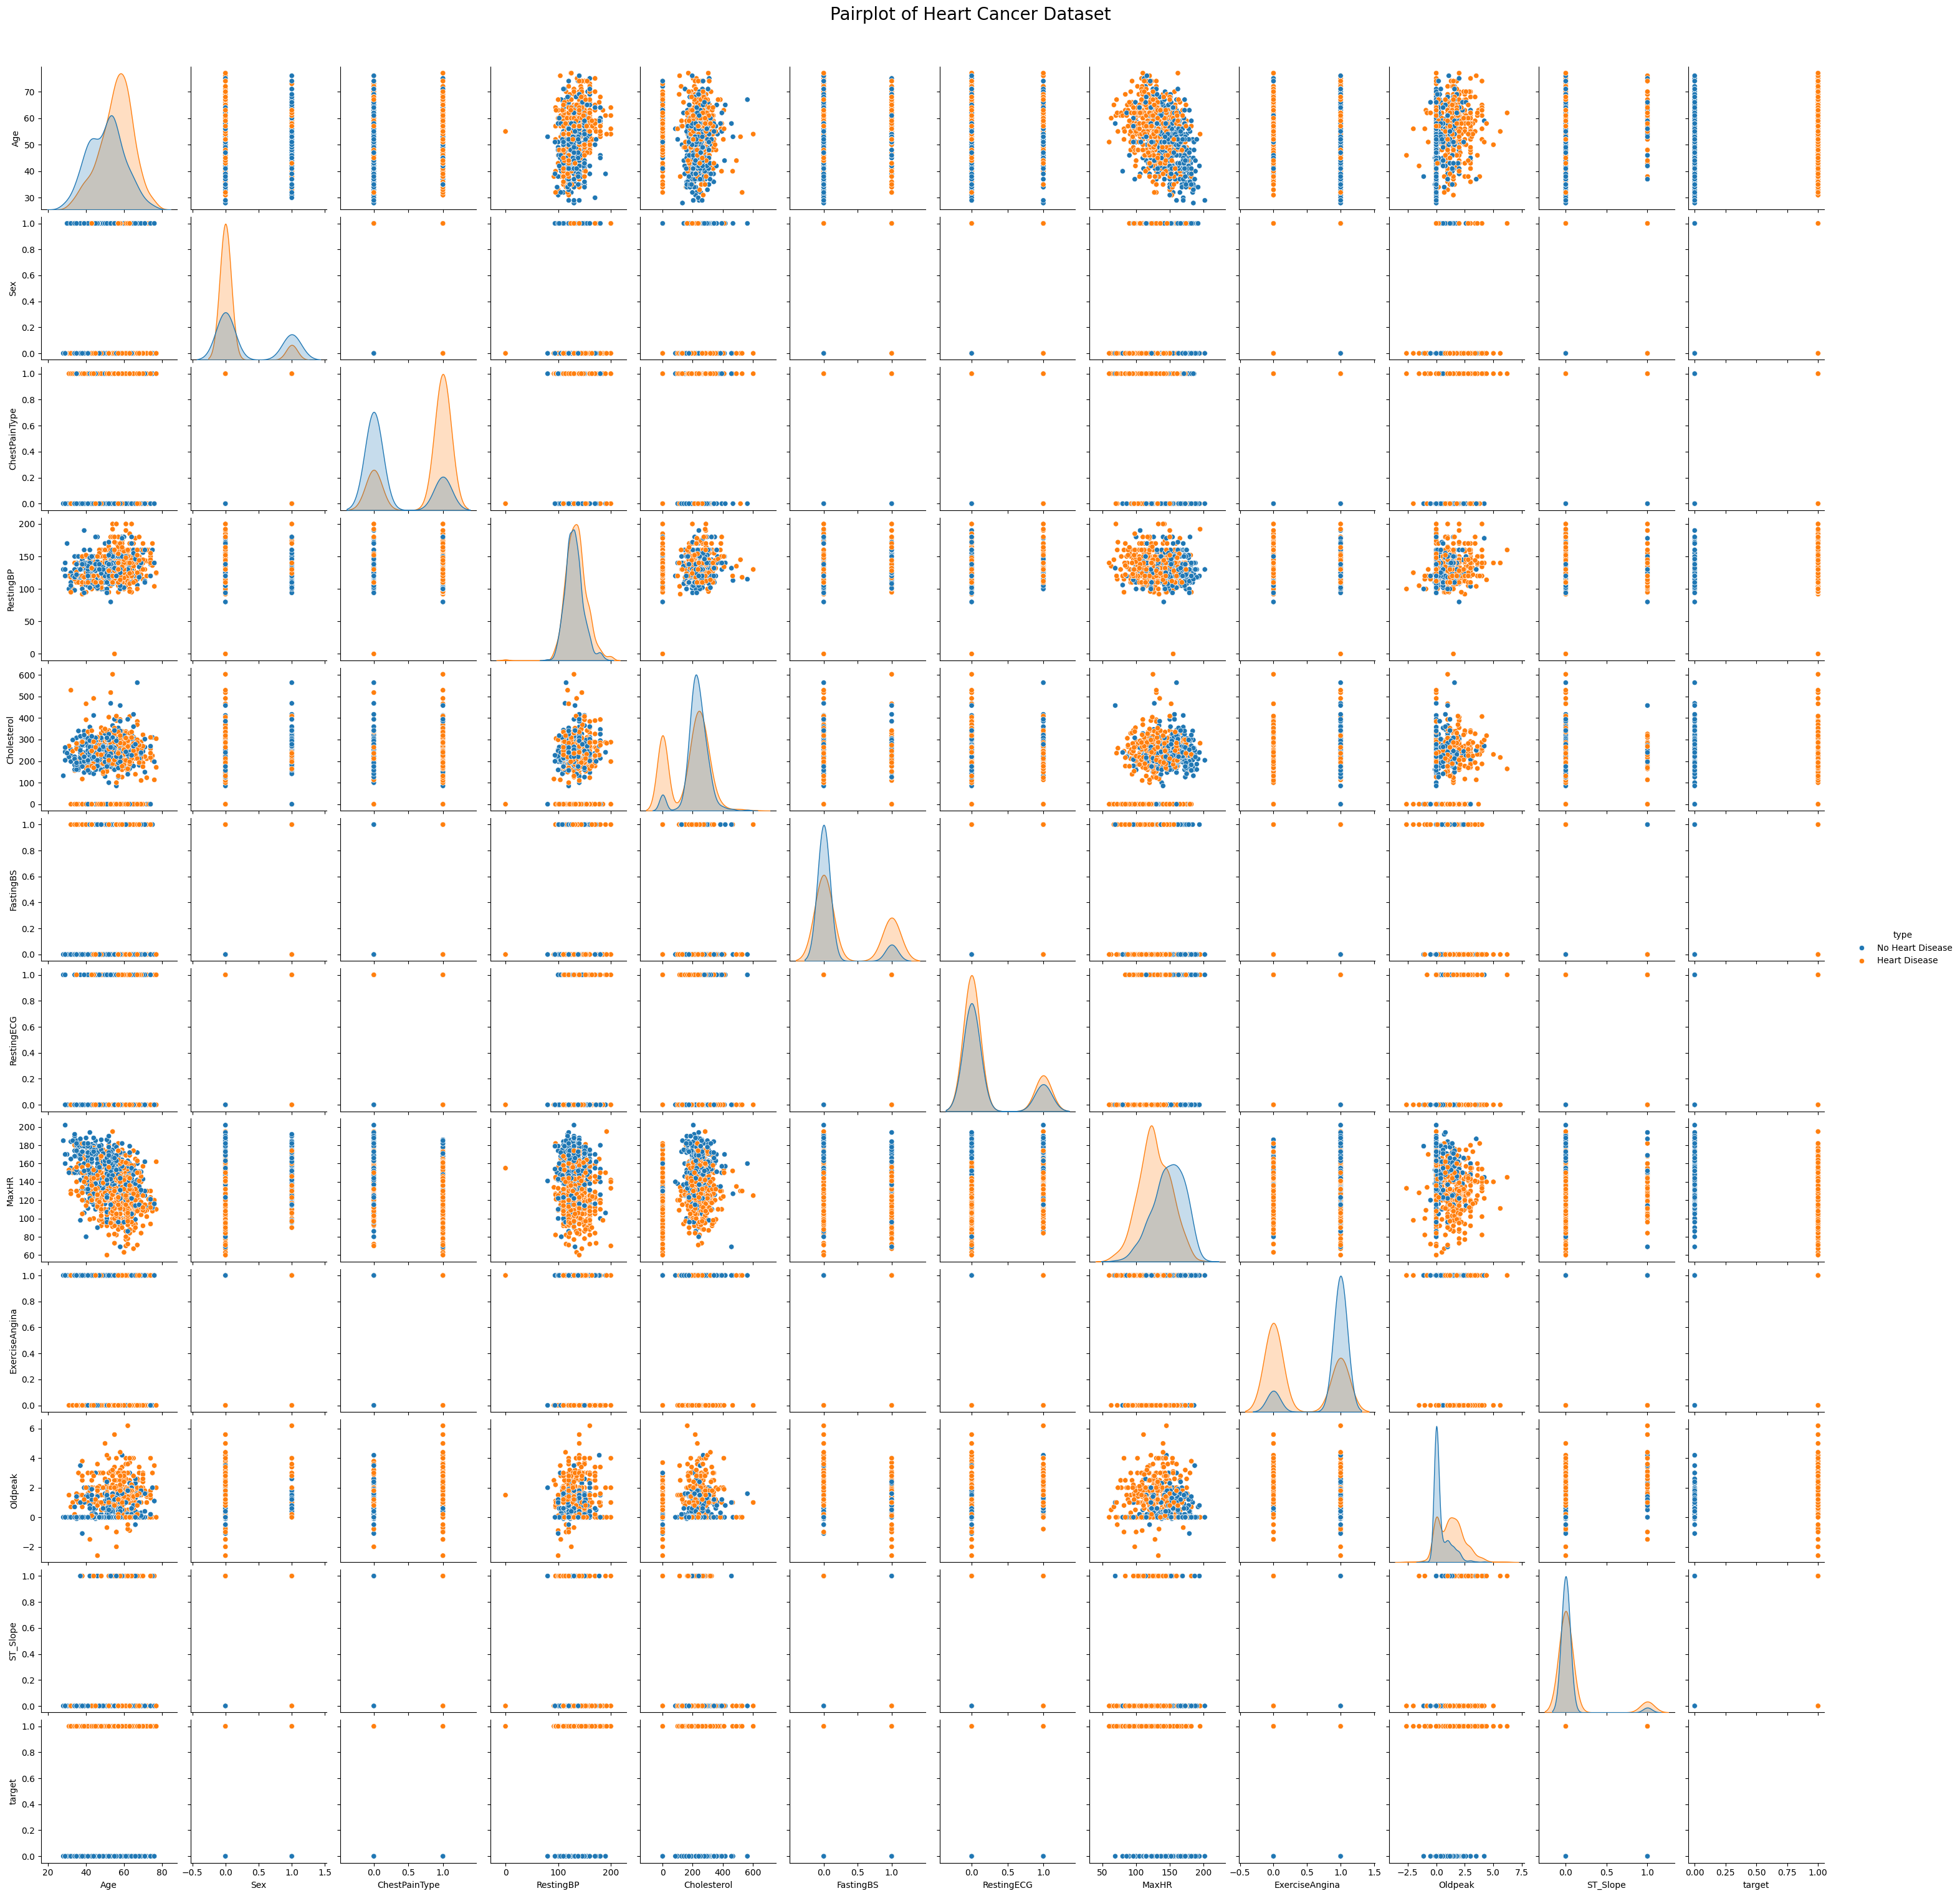

In [18]:
df = X.copy()
df['target'] = y

# Mapping for the target variable (0 and 1) to descriptive names
target_names_map = {0: 'No Heart Disease', 1: 'Heart Disease'}
df['type'] = df['target'].map(target_names_map)

sns.pairplot(df, hue="type")
plt.suptitle("Pairplot of Heart Cancer Dataset", y=1.02, fontsize=20)
plt.show()

In [19]:
print(y.value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


The target feature output shows that the classes are imbalanced at 55% vs 45%. Using the SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. SMOTE creates synthetic samples from the minority class. This may help prevent the model from becoming biased towards the majority class.

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

print("Resampled target variable distribution:\n", y_resample.value_counts())

Resampled target variable distribution:
 HeartDisease
0    401
1    401
Name: count, dtype: int64


In [22]:
# Train new Hist model
model_refit = HistGradientBoostingClassifier(max_bins=12, max_depth=4, max_iter=100)
model_refit.fit(X_resample, y_resample) # Fit training set to model

y_pred = model_refit.predict(X_test) # Train prediciton

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.821


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
import pandas as pd

In [41]:
# Copy SMOTE X variable
X_resample_copy = X_resample.copy()

# Call Standard Scaler to normalize Z-Scores
scaler = StandardScaler()
X_resample_scaled = scaler.fit_transform(X_resample_copy)

# Conducted a LogisticRegression Model on both Male and Females
model = LogisticRegression(random_state=42, solver='liblinear') # Added random_state and solver for reproducibility and stability
model.fit(X_resample_scaled, y_resample)
importances = pd.Series(abs(model.coef_[0]), index=X_resample.columns)
print(importances.sort_values(ascending=False))

# Scale X_test
X_test_scaled = scaler.transform(X_test)
y_pred_lr = model.predict(X_test_scaled)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy on test set after SMOTE and Scaling: {accuracy_lr:.3f}')
print("Classification Report for Logistic Regression after SMOTE and Scaling:\n", classification_report(y_test, y_pred_lr))

Oldpeak           0.812159
ChestPainType     0.684993
ExerciseAngina    0.682865
FastingBS         0.567982
Cholesterol       0.436381
Sex               0.412335
MaxHR             0.338188
ST_Slope          0.194488
RestingECG        0.163635
Age               0.104006
RestingBP         0.012208
dtype: float64
Logistic Regression Accuracy on test set after SMOTE and Scaling: 0.848
Classification Report for Logistic Regression after SMOTE and Scaling:
               precision    recall  f1-score   support

           0       0.76      0.92      0.84        77
           1       0.93      0.79      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [23]:
model = DecisionTreeClassifier(random_state=42)

# param_grid = {
#       'max_depth': [3, 5, 7, None],
#       'min_samples_split': [2, 5, 10, None],
#       'criterion': ['gini', 'entropy']
#       }

param_grid = {
    'max_leaf_nodes': [3, 5, 7, 10],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [24]:
grid_search_resam = GridSearchCV(estimator=model,
                                 param_grid=param_grid,
                                 cv=5,
                                 scoring='accuracy',
                                 n_jobs=-1)

X_resampled_abs = abs(X_resample)
y_resampled_abs = abs(y_resample)

print(X_resampled_abs.info())

grid_search_resam.fit(X_resampled_abs, y_resampled_abs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             802 non-null    int64  
 1   Sex             802 non-null    float64
 2   ChestPainType   802 non-null    float64
 3   RestingBP       802 non-null    int64  
 4   Cholesterol     802 non-null    int64  
 5   FastingBS       802 non-null    int64  
 6   RestingECG      802 non-null    float64
 7   MaxHR           802 non-null    int64  
 8   ExerciseAngina  802 non-null    float64
 9   Oldpeak         802 non-null    float64
 10  ST_Slope        802 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 69.1 KB
None


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_leaf_nodes': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [30]:
best_grid_search_resam = grid_search_resam.best_estimator_

y_pred_dt_resampled = best_grid_search_resam.predict(X_test)

accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)

print(f'Decision Tree Accuracy on test set after SMOTE: {accuracy_dt_resampled:.3f}')


Decision Tree Accuracy on test set after SMOTE: 0.761


In [27]:
from sklearn.metrics import classification_report

In [28]:

print("Classification Report for Decision Tree after SMOTE:\n", classification_report(y_test, y_pred))

Classification Report for Decision Tree after SMOTE:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.89      0.79      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



Using the SMOTE method, there was an improvement in precision for both cancer classifications.

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target,type
0,40,0.0,0.0,140,289,0,0.0,172,1.0,0.0,0.0,0,No Heart Disease
1,49,1.0,0.0,160,180,0,0.0,156,1.0,1.0,0.0,1,Heart Disease
2,37,0.0,0.0,130,283,0,0.0,98,1.0,0.0,0.0,0,No Heart Disease
3,48,1.0,1.0,138,214,0,0.0,108,0.0,1.5,0.0,1,Heart Disease
4,54,0.0,0.0,150,195,0,0.0,122,1.0,0.0,0.0,0,No Heart Disease


Separated the dataframe on gender for exploritory analysis

In [33]:
males_df = heart_df[heart_df['Sex'] == 0.0]
females_df = heart_df[heart_df['Sex'] == 1.0]

print("Males DataFrame head:")
print(males_df.head())
print("\nFemales DataFrame head:")
print(females_df.head())

Males DataFrame head:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40  0.0            0.0        140          289          0         0.0   
2   37  0.0            0.0        130          283          0         0.0   
4   54  0.0            0.0        150          195          0         0.0   
5   39  0.0            0.0        120          339          0         0.0   
7   54  0.0            0.0        110          208          0         0.0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172             1.0      0.0       0.0             0  
2     98             1.0      0.0       0.0             0  
4    122             1.0      0.0       0.0             0  
5    170             1.0      0.0       0.0             0  
7    142             1.0      0.0       0.0             0  

Females DataFrame head:
    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
1    49  1.0            0.0        160          180 

In [34]:
males_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0.0,0.0,140,289,0,0.0,172,1.0,0.0,0.0,0
2,37,0.0,0.0,130,283,0,0.0,98,1.0,0.0,0.0,0
4,54,0.0,0.0,150,195,0,0.0,122,1.0,0.0,0.0,0
5,39,0.0,0.0,120,339,0,0.0,170,1.0,0.0,0.0,0
7,54,0.0,0.0,110,208,0,0.0,142,1.0,0.0,0.0,0


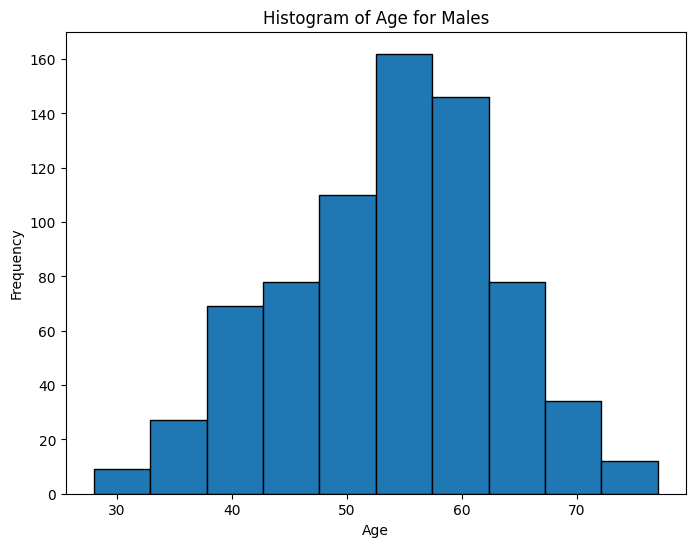

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(males_df['Age'], bins=10, edgecolor='black') # Plotting histogram for 'Age' column
plt.title('Histogram of Age for Males')
plt.xlabel('Age') # Corrected xlabel to a string
plt.ylabel('Frequency') # Corrected ylabel to a string
plt.show()

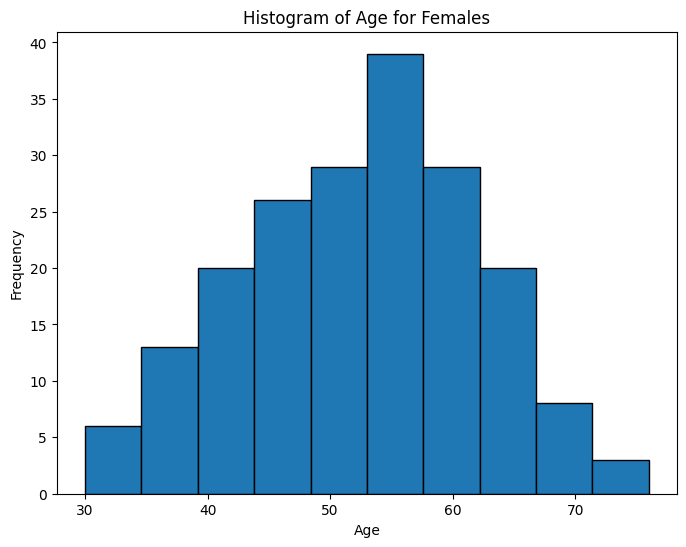

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(females_df['Age'], bins=10, edgecolor='black') # Plotting histogram for 'Age' column
plt.title('Histogram of Age for Females')
plt.xlabel('Age') # Corrected xlabel to a string
plt.ylabel('Frequency') # Corrected ylabel to a string
plt.show()

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [36]:
# Conducted a LogisticRegression Model on both Male and Females
model = LogisticRegression()
model.fit(X, y)
importances = pd.Series(abs(model.coef_[0]), index=X.columns)
print(importances.sort_values(ascending=False))

# Results of trained model and X_test, y_test corrolation data
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
importances = pd.Series(result.importances_mean[sorted_idx], index=X_test.columns[sorted_idx])
print(importances.sort_values(ascending=False))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ChestPainType     1.632870
ExerciseAngina    1.228141
Sex               1.104287
FastingBS         1.088590
Oldpeak           0.668361
ST_Slope          0.340024
RestingECG        0.222335
Age               0.024380
MaxHR             0.011742
Cholesterol       0.003399
RestingBP         0.003245
dtype: float64
ChestPainType     0.114130
Oldpeak           0.046739
FastingBS         0.028804
ExerciseAngina    0.028804
Sex               0.020652
Cholesterol       0.019022
Age               0.018478
RestingBP         0.005435
MaxHR             0.004348
RestingECG        0.002174
ST_Slope         -0.000543
dtype: float64
